EDA structure
1. Set up environment and Load data
2. CLean and Preprocess data
3. Report & Conduct Analysis

Phân biệt Reporting && Analysis
- Reporting trả lời cho câu hỏi "What happened?"
- Analysis trả lời cho câu hỏi "Why it happened?"

# 1. Set up environment and Load data

In [1]:
import pandas as pd
import os # giúp tương tác với máy tính
import matplotlib.pyplot as plt

# 2. Clean and Preprocess data

#### Test read_csv for path

In [2]:
path = r'C:\Users\Admin\Documents\Sales Reporting'
df = pd.read_csv(path+'\sales2019_1.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### 2.1 Merge 12-month data

In [3]:
os.listdir(path) # hiển thị các tập tin có trong đường dẫn đó

['sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [4]:
# Muốn lấy ra đường dẫn tương ứng với các tập tin
file_paths = [] # Tạo ra 1 list để lưu các đường dẫn của các file đó
for file in os.listdir(path):
    if file.endswith('.csv'): # trường hợp này chỉ lấy file có đuôi .csv
        file_path = path + '\\' + file
        file_paths.append(file_path)
print(file_paths)

['C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_1.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_10.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_11.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_12.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_2.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_3.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_4.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_5.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_6.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_7.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_8.csv', 'C:\\Users\\Admin\\Documents\\Sales Reporting\\sales2019_9.csv']


In [5]:
# Thử in ra dataframe của từng tập tin đó
file_paths = []
for file in os.listdir(path):
    if file.endswith('.csv'): 
        file_path = path + '\\' + file
        file_paths.append(file_path)
df = pd.read_csv(file_paths[0])
df.head()
# OK lúc này đã thấy là in ra được df của từng tập tin nếu ta chạy lần lượt từ 0
# Bây giờ tiến hành merge 12 tháng đó thành 1 tập tin thì sẽ gọn và dễ dàng phân tích hơn.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
# Merge 12 tệp tin sử dụng phương thức Concat()
frames = [] # tạo 1 list để lưu từng dataframe đó
for file in os.listdir(path):
    if file.endswith(".csv"):
        file_path = path + '\\' + file
        df_file = pd.read_csv(file_path)
        frames.append(df_file)
        result = pd.concat(frames)

df = result
df.to_csv("annualSales2019.csv", index=False) # lưu thành 1 file csv
# index = False giúp loại đi cột thứ tự đầu tiên

In [7]:
print(df['Order Date'].dtypes)

object


### 2.2 Add "Month" column

In [8]:
df["Month"] = df['Order Date'].str[0:2]# start index= 0 và stop index= 2 tức là tới 2 thì dừng
df = df.dropna(how="all")# loại bỏ value = nan
df = df[df['Month'] != "Or"]# loại bỏ value = or
print(set(df['Month']))
df.head()

{'02', '11', '10', '03', '05', '06', '07', '09', '04', '12', '01', '08'}


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


### 2.3 Add "City" column

In [9]:
city = lambda x : x.split(',')[1]
df['City'] = df['Purchase Address'].apply(city)
print(set(df['City']))
df.head()

{' Austin', ' Boston', ' Seattle', ' Atlanta', ' Los Angeles', ' Portland', ' New York City', ' Dallas', ' San Francisco'}


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


### 2.4 Add "Sales" column

In [10]:
print(df['Price Each'].dtypes)
print(df['Quantity Ordered'].dtypes)
# Đúng vậy nó k phải dạng số, => chuyển sang dạng số

object
object


In [11]:
# Convert 'str' to 'int'
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
print(df['Price Each'].dtypes)
print(df['Quantity Ordered'].dtypes)

float64
int64


In [12]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin,11.99


In [13]:
# Chuyển vị trí cột 'Sales' sang vị trí khác
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


# 3. Reporting

Questions:
1. what was the best month for sales?
   How much was earned that month?
2. What city has the best sales?
3. What time should we display ads to maximize the likelihood of customer's buying product?
4. What products are the most often sold together?
5. What product sold the most?
   Why do you think it sold the most?

### 3.1 What was the best month for sales ? How much was earned that month ?

In [14]:
sales_value_month = df.groupby('Month').sum()['Sales']
print(sales_value_month)
print("Best Sales: "+ str(sales_value_month.max()))

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64
Best Sales: 4613443.34


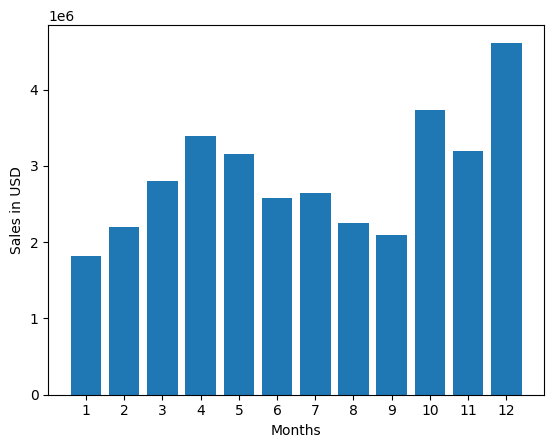

In [15]:
months = range(1, 13)
plt.bar(x = months, height = sales_value_month)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.show()

### 3.2 What city has the best sales?

In [16]:
sales_value_city = df.groupby('City').sum()['Sales']
print(sales_value_city)
print(sales_value_city.max())
print(set(df['City']))

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64
8262203.91
{' Austin', ' Boston', ' Seattle', ' Atlanta', ' Los Angeles', ' Portland', ' New York City', ' Dallas', ' San Francisco'}


In [17]:
cities = df['City'].unique()
print(cities)
# Để ý rõ sẽ thấy thứ tự lấy ra values trong City khác với thứ tự trong phần Sales City k??
# Đó chính là lý do dẫn đến sự sai kết quả khi mà nhìn bằng mắt thấy "San Francisco" best
# Nhưng kết quả biểu đồ thì lại là "New York City"
# Trường hợp theo tháng là đặc biệt do nó cả ở 2 loại đều sắp xếp lần lượt từ 1-> 12

[' Boston' ' Portland' ' San Francisco' ' Los Angeles' ' Austin'
 ' Atlanta' ' Seattle' ' New York City' ' Dallas']


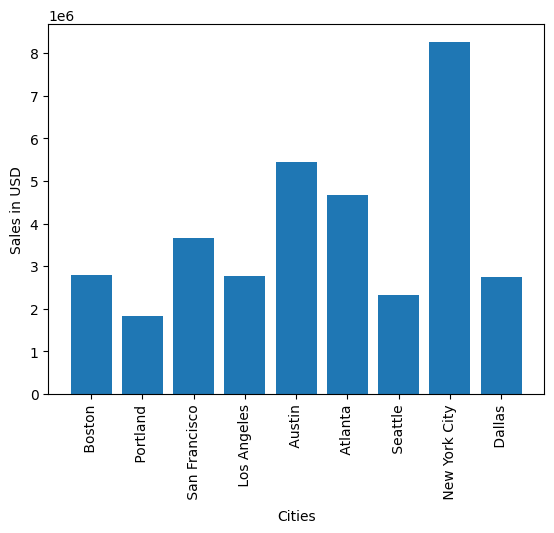

In [18]:
cities = df['City'].unique()
plt.bar(x = cities, height = sales_value_city)
plt.xticks(cities, rotation = 90)# chỉnh city theo 90 độ để k bị lồng chữ lên nhau
plt.xlabel("Cities")
plt.ylabel("Sales in USD")
plt.show()

Giải thích cho dòng code : 'cities = [city for city, sales in sales_value_city.items()]'\
Ví dụ sau:

sales_value_city = {
    'New York': 25000,
    'Los Angeles': 19500,
    'San Francisco': 30000,
    'Houston': 15000
}
cities = [city for city, sales in sales_value_city.items()]

Khi bạn thực thi đoạn mã này, đây là cách nó hoạt động:
+ sales_value_city.items() sẽ trả về một iterator của các cặp (tuples) gồm key và value: ('New York', 25000), ('Los Angeles', 19500), ....
+ Với mỗi tuple, for city, sales in ... sẽ gán 'New York' vào biến city và 25000 vào biến sales, sau đó tiếp tục với 'Los Angeles', 19500, và cứ thế tiếp tục.
+ [city for city, sales in ...] sẽ tạo ra một list mới chỉ chứa giá trị từ biến city mà bỏ qua sales.

Kết quả của list comprehension sẽ là:
['New York', 'Los Angeles', 'San Francisco', 'Houston']

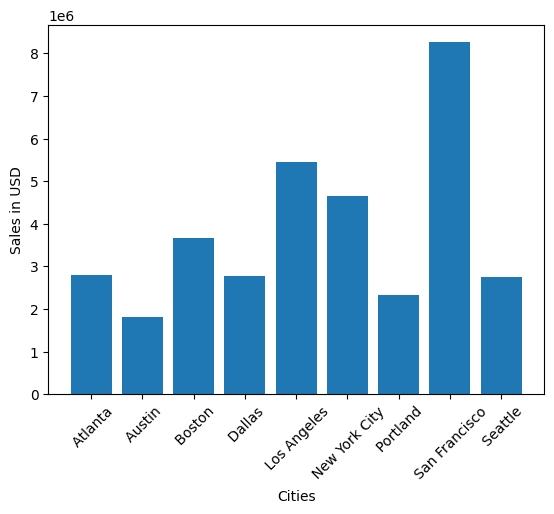

In [19]:
cities = [city for city, sales in sales_value_city.items()] # tạo ra list lưu city
plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation = 45)
plt.xlabel("Cities")
plt.ylabel("Sales in USD")
plt.show()

### 3.3 What time should we display ads to maximize the likehood of customer's buying product?

Nên hiển thị quảng cáo vào thời điểm nào để tối đa hóa khả năng khách hàng mua sản phẩm?
Tức là trả lời cho câu hỏi thời gian nào trong ngày thường có lượng mua nhiều nhất (tính theo tiền / đơn)

### Tính theo tiền

In [20]:
df["Hours"] = df['Order Date'].str[9:11]
print(df["Hours"].dtypes)
df.head()

object


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin,11


In [21]:
print(set(df['Hours']))

{'02', '07', '01', '15', '13', '19', '23', '06', '17', '09', '05', '03', '22', '14', '21', '20', '00', '04', '12', '16', '10', '11', '18', '08'}


In [22]:
sales_value_hour = df.groupby('Hours').sum()['Sales']
print(sales_value_hour)
print(sales_value_hour.max())
print(set(df['Hours']))

Hours
00     713721.27
01     460866.88
02     234851.44
03     145757.89
04     162661.01
05     230679.82
06     448113.00
07     744854.12
08    1192348.97
09    1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64
2412938.54
{'02', '07', '01', '15', '13', '19', '23', '06', '17', '09', '05', '03', '22', '14', '21', '20', '00', '04', '12', '16', '10', '11', '18', '08'}


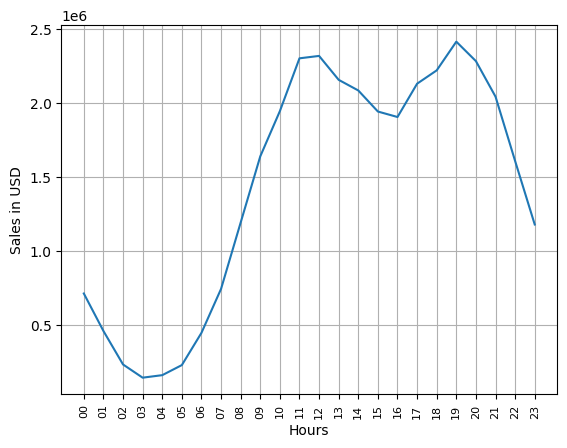

In [23]:
hours = [hour for hour, sales in sales_value_hour.items()] 
plt.plot(hours, sales_value_hour)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

### Tính theo đơn

In [24]:
print(df['Quantity Ordered'].dtypes)

int64


In [25]:
sales_value_hour = df.groupby('Hours').sum()['Quantity Ordered']
print(sales_value_hour)
print(sales_value_hour.max())
print(set(df['Hours']))

Hours
00     4428
01     2619
02     1398
03      928
04      937
05     1493
06     2810
07     4556
08     7002
09     9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64
14470
{'02', '07', '01', '15', '13', '19', '23', '06', '17', '09', '05', '03', '22', '14', '21', '20', '00', '04', '12', '16', '10', '11', '18', '08'}


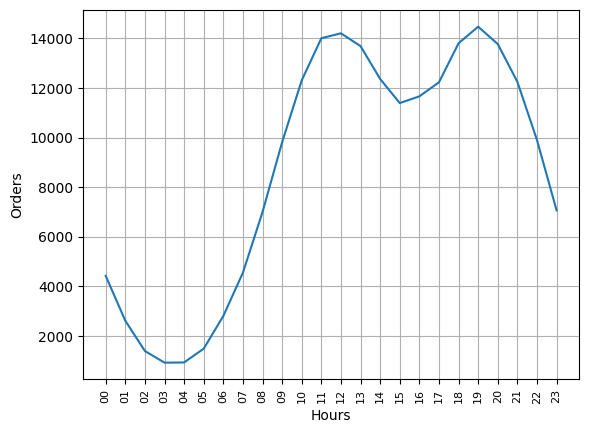

In [26]:
hours = [hour for hour, orders in sales_value_hour.items()] 
plt.plot(hours, sales_value_hour)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Orders')
plt.show()

### 3.4 What products are the most often sold together?

In [54]:
# Tạo một DataFrame mới df_dup từ DataFrame gốc df bằng cách chọn những dòng mà 'Order ID' xuất hiện nhiều hơn một lần. 
# keep=False đảm bảo rằng tất cả các bản ghi trùng lặp đều được giữ lại, 
# điều này hữu ích để tìm các sản phẩm được bán chung trong cùng một đơn hàng.
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
41,141275,USB-C Charging Cable,1,11.95,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,08
58,141290,AA Batteries (4-pack),3,3.84,11.52,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,08
133,141365,Vareebadd Phone,1,400.00,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [57]:
dup_result = df_dup.groupby('Order ID')['Product'].apply(','.join)
dup_result

Order ID
141275              USB-C Charging Cable,Wired Headphones
141290     Apple Airpods Headphones,AA Batteries (4-pack)
141365                   Vareebadd Phone,Wired Headphones
141384                  Google Phone,USB-C Charging Cable
141450            Google Phone,Bose SoundSport Headphones
                               ...                       
319536                Macbook Pro Laptop,Wired Headphones
319556                      Google Phone,Wired Headphones
319584                            iPhone,Wired Headphones
319596                    iPhone,Lightning Charging Cable
319631    34in Ultrawide Monitor,Lightning Charging Cable
Name: Product, Length: 7136, dtype: object

In [60]:
groupProduct = lambda x: ','.join(x)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1108\2537976060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,08,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,08,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone,Wired Headphones"


In [63]:
df_dup = df_dup[['Order ID', 'All Products']]
df_dup.head()

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
42,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"


In [64]:
df_dup.drop_duplicates() # loại bỏ những dòng trùng nhau

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [67]:
# đếm xem có bao nhiêu 'All products' được bắn cùng nhau
df_dup['All Products'].value_counts().head(10)

All Products
iPhone,Lightning Charging Cable                       1764
Google Phone,USB-C Charging Cable                     1712
iPhone,Wired Headphones                                722
Vareebadd Phone,USB-C Charging Cable                   624
Google Phone,Wired Headphones                          606
iPhone,Apple Airpods Headphones                        572
Google Phone,Bose SoundSport Headphones                322
Google Phone,USB-C Charging Cable,Wired Headphones     231
Vareebadd Phone,Wired Headphones                       208
iPhone,Lightning Charging Cable,Wired Headphones       168
Name: count, dtype: int64

### 3.5 What product sold the most? Why do you think it sold the most?

Tại sao sản phẩm đó lại bán chạy nhất.Dựa vào thông tin mk có thì mk sẽ phân tích về giá của nó, có thể giá của sản phẩm đó là rẻ nhất trong số đó thì sao

In [28]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
print(all_products)
all_products.max()
print(set(df['Product']))

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64
{'USB-C Charging Cable', 'AAA Batteries (4-pack)', 'Wired Headphones', 'Flatscreen TV', 'Google Phone', 'LG Washing Machine', 'AA Batteries (4-pack)', '27in FHD Monitor', 'LG Dryer', 'Vareebadd Phone', 'Lightning Charging Cable', 'Bose SoundSport Headphones', '27in 4K Ga

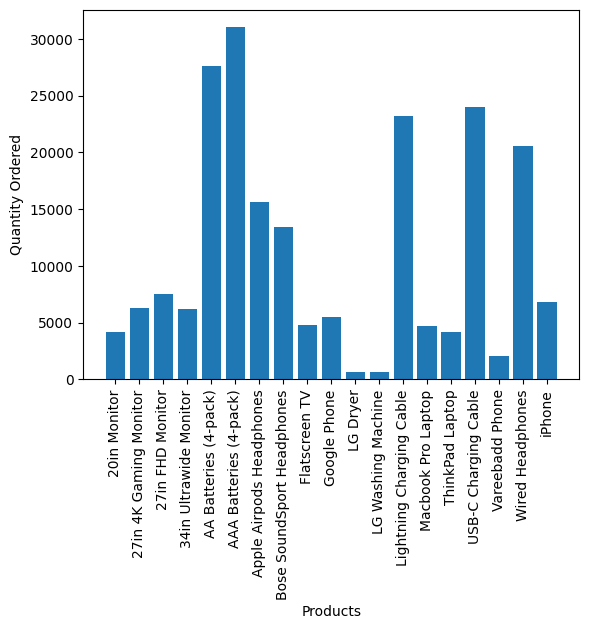

In [29]:
products = [product for product, order in all_products.items()] # tạo ra list lưu city
plt.bar(x=products, height=all_products)
plt.xticks(products, rotation = 90)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.show()

In [36]:
print(df['Price Each'].dtypes)
print(set(df['Price Each']))

float64
{2.99, 99.99, 1700.0, 389.99, 3.84, 999.99, 11.99, 11.95, 300.0, 14.95, 109.99, 400.0, 149.99, 150.0, 600.0, 379.99, 700.0}


In [39]:
# Group by 'Product' and calculate the mean only for 'Price Each'
prices = df.groupby('Product')['Price Each'].mean() # tính giá trị trung bình
print(prices.min())
prices

2.99


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

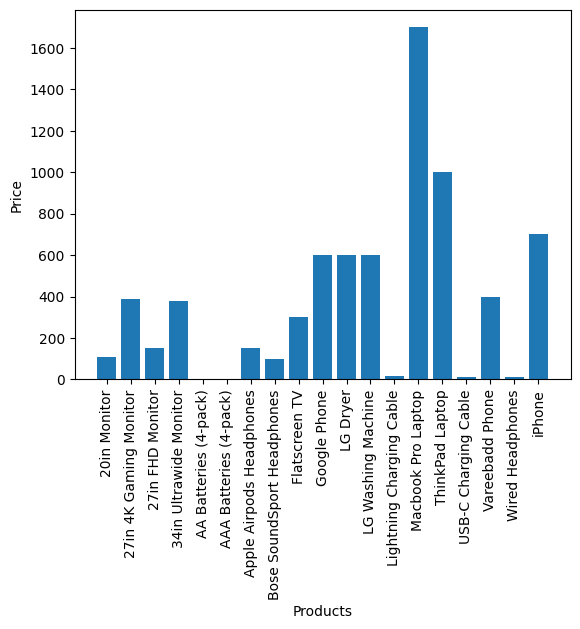

In [44]:
prices_lst = [product_name for product_name, price in prices.items()] 
plt.bar(x=prices_lst, height=prices)
plt.xticks(prices_lst, rotation = 90)
plt.xlabel("Products")
plt.ylabel("Price")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1108\2468907872.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation=90, size=8)


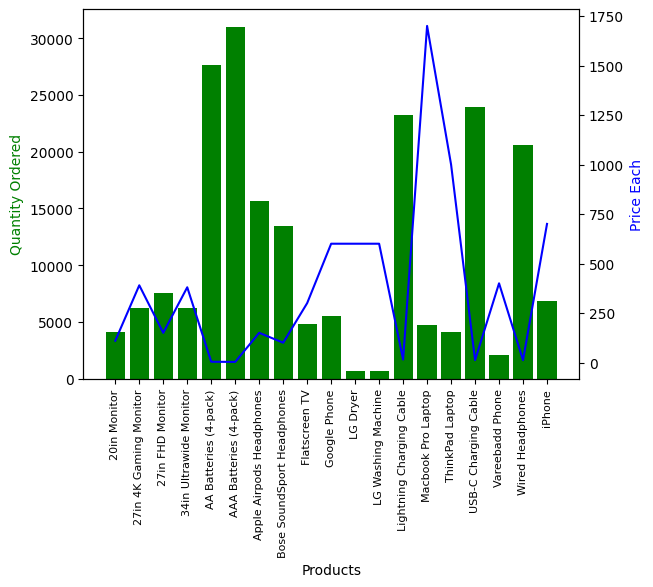

In [45]:
# Thể hiện 2 biểu đồ trong 1 bảng
x = products
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')
ax1.set_xticklabels(products, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()